<h2>Dataset description</h2>

Dataset source: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>.
This dataset is about cars and their specifications.


<b> Goal: </b> Study the relation between each feature of a car and its price.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


### 1. Import data

In [2]:
df = pd.read_csv("auto.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


The dataset doesn't contain the headers so they are provided below.

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style", "drive-wheels",
           "engine-location","wheel-base", "length","width","height","curb-weight","engine-type", "num-of-cylinders",
           "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm",
           "city-mpg","highway-mpg","price"]
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


From the dataset, some values are represented as `?`, this corresponds to missing values.

### 2. Explore the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Some attributes don't have the right data type.

In [5]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


### 3. Handling missing values

For now the python packages can't find the missing values because `?` is not a representation they are programmed to catch. So these `?` have to be replaced by NaN.

In [6]:
# question 3.1 answer
df.replace("?", np.nan, inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#### How many missing values does each attribute have?

In [7]:
nan_sum = df.isnull().sum()
nan_sum

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

What are the features having missing values?

In [8]:
has_nan = nan_sum[nan_sum > 0]
has_nan

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

Text(0.5, 1.0, 'Number of Missing Values per attribute')

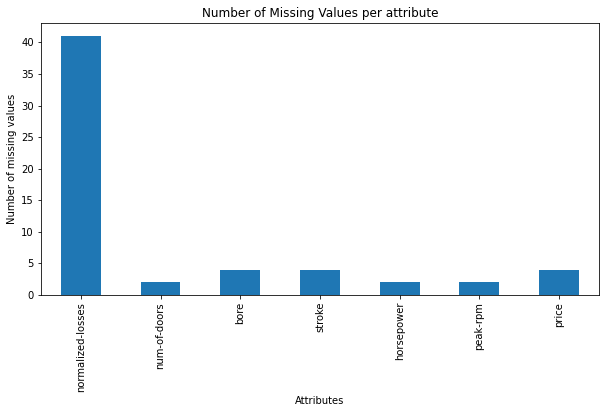

In [9]:
has_nan.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Attributes')
plt.ylabel('Number of missing values')
plt.title('Number of Missing Values per attribute')

<h4> 3.2. Dealing with missing data </h4>

There are different approcahes to deal with missing data. Below are some examples:

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by most frequent value<br>
        c. replace it based on other functions
    </li>
</ol>

+ For the **normalized-losses** attribute, since the number of null values is 41 which is very high for a dataset of 205 rows, then it should be dropped


In [10]:
df.drop(columns="normalized-losses", axis=0, inplace=True)

+ Drop the rows where more than one attribute is null.

In [11]:
nb_of_attributes = df.columns.size - 1
df.dropna(axis=0, thresh=nb_of_attributes, inplace=True)
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Just two attributes with missing values still exist, one of them is the dependent variable 'price'.

In [12]:
nan_sum = df.isnull().sum()
nan_sum[nan_sum > 0]

num-of-doors    2
price           4
dtype: int64

For the num-of-doors attribute, since it's storing nominal values, then we have to replace the missing values with the mode of the column(most occuring value).

In [13]:
                                                 # [0] --> if the column has more than one mode
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True) 

In [14]:
print('Number of rows: ', df.shape)
nan_sum = df.isnull().sum()
has_nan = nan_sum[nan_sum > 0]
print('\nAttributes with missing values: ')
print(has_nan)


Number of rows:  (199, 25)

Attributes with missing values: 
price    4
dtype: int64


For the price attribute, since it is the dependant variable, it is important to handle its missing values efficiently.

First, the dataset has 199 rows and there still exist only 4 NaN values which are in the price attribute, so replacing them with other values won't cause significant negative consequences.

To know what it is the best imputation to do, visualizing the distribution of the price attribute can provide information on what is the best approach to follow!

In [15]:
# inorder to plot the distribution, I have to take a copy of the column free of missing values and change the column type to int
clean_price = df["price"].dropna()
clean_price = clean_price.astype("int64")
clean_price.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

count      195.000000
mean     13248.015385
std       8056.330093
min       5118.000000
25%       7756.500000
50%      10245.000000
75%      16509.000000
max      45400.000000
Name: price, dtype: float64

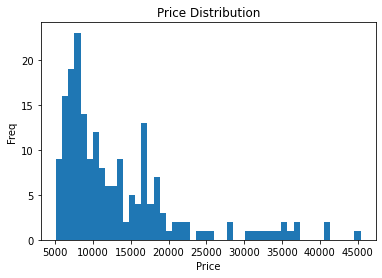

In [16]:
plt.hist(clean_price, bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Freq")
clean_price.describe()  # to measure the dispersion of the values

First, from the dispersion metrics, since the 3rd quartile is 16509 and the max is 45400 where there exists a huge difference between them, and if we compared the median with the 3rd quartile, it appears that there exists outliers. Besides, the histogram shows that the data are positively skewed which suggest that the arithmatic mean will be biased by outliers.

Therefore, the best best approach is to replace the missing values by the median of the attribute.

In [17]:
df["price"].fillna(df["price"].median(), inplace=True)

To make sure that we handled all the missing values.

In [18]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### 4. Correct data format
While I was exploring the data in the previous steps, it appeared that some attributes doesn't have their preferred data type, so the data types of these attributes will be converted.

In [19]:
df[["horsepower", "peak-rpm", "price"]] = df[["horsepower", "peak-rpm", "price"]].astype(np.int64)
df[["bore", "stroke"]] = df[["bore","stroke"]].astype(np.float64)
df.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

### 6. Data Normalization

The range of `length`, `width` and `height` is significantly different. This might force the algorithms to prefer attributes with large values despite that these attributes might not be more important or related to the dependent variable.

To fix this, these attributes will be normalized.

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df[["length", "width", "height"]])
df[["length", "width", "height"]] = scaler.transform(df[["length", "width", "height"]])
df[["length", "width", "height"]].head()

,length,width,height
0,0.413433,0.316667,0.083333
1,0.413433,0.316667,0.083333
2,0.449254,0.433333,0.383333
3,0.529851,0.491667,0.541667
4,0.529851,0.508333,0.541667


### 6. Binning
When we want to study the relation between price and horsepower, we only care about three cases: small, medium and high. But horsepower is a continuous attribute so it needs to be grouped into three bins.

First, check the distribution of horsepower

Text(0, 0.5, 'Freq')

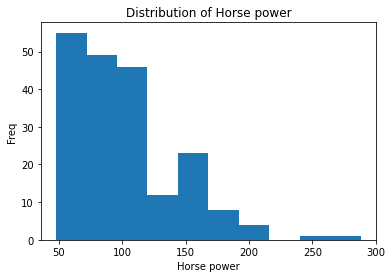

In [21]:
df["horsepower"]
plt.hist(df["horsepower"])
plt.title("Distribution of Horse power")
plt.xlabel("Horse power")
plt.ylabel("Freq")

The distribution of horsepower is positively skewed.

##### Bin the horsepower attribute.

In [22]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
print(bins)
bin_names = ["small", "medium", "high"]
df["horsepower_category"] = pd.cut(df["horsepower"], bins, labels=bin_names, include_lowest=True)
df["horsepower_category"].head()

[ 48. 128. 208. 288.]


0     small
1     small
2    medium
3     small
4     small
Name: horsepower_category, dtype: category
Categories (3, object): ['small' < 'medium' < 'high']

Get the number of vehicles for each category of horsepower.

Text(0, 0.5, 'Freq')

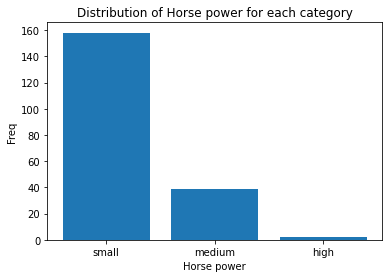

In [23]:
plt.bar(bin_names, df["horsepower_category"].value_counts())
plt.title("Distribution of Horse power for each category")
plt.xlabel("Horse power")
plt.ylabel("Freq")

As the graph suggests, most sold cars have small horsepower value. About 80% of the sold cars have small horsepower value with just 1% having high.

In [24]:
percentage = (df.groupby("horsepower_category").count()["make"] / df["horsepower_category"].count()) * 100
percentage

horsepower_category
small     79.396985
medium    19.597990
high       1.005025
Name: make, dtype: float64

Text(0.5, 1.0, 'Distribution of Horse power for each category')

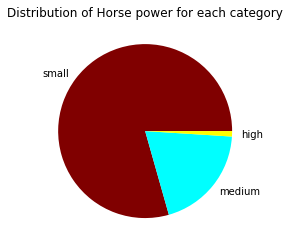

In [25]:
colors = ["Maroon", "cyan", "yellow"]
plt.pie(percentage, labels=bin_names, colors=colors)
plt.title("Distribution of Horse power for each category")

## Explore the features affecting the price of a car

#### Study the relation between price and the continuous attributes using the correlation coefficient and linear regression.

In [26]:
dataframe = df[["price","engine-size", "highway-mpg", "peak-rpm", "stroke", "length", "width", "height"]]
dataframe.head()

,price,engine-size,highway-mpg,peak-rpm,stroke,length,width,height
0,13495,130,27,5000,2.68,0.413433,0.316667,0.083333
1,16500,130,27,5000,2.68,0.413433,0.316667,0.083333
2,16500,152,26,5000,3.47,0.449254,0.433333,0.383333
3,13950,109,30,5500,3.40,0.529851,0.491667,0.541667
4,17450,136,22,5500,3.40,0.529851,0.508333,0.541667


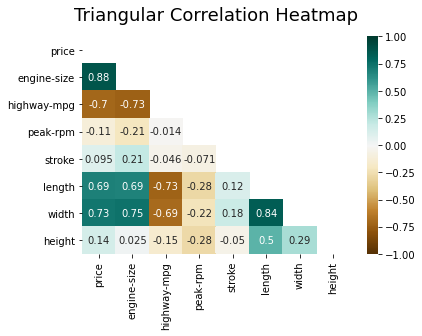

In [27]:
mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))  # to isolate the upper triangle
heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangular Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

To prove if the relation between two variables is statistically significant, we have to test the following hypotheses.

`ho`: There is no correlation between price and the other attributes.
`h1`: There is correlation between price and the other attributes.

`ho` will be rejected if p_value < 0.05

+ Price X engine-size

1.906028090773062e-64

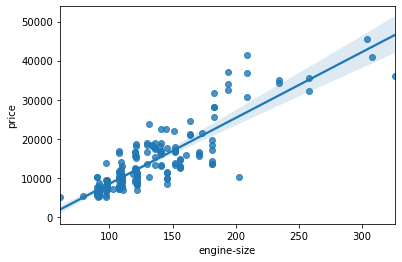

In [28]:
sns.regplot(x="engine-size", y="price", data=dataframe)
result = stats.linregress(df["price"], df["engine-size"])
result.pvalue

The graph shows a strong linear positive relationship(r=0.88) between price and engine-size with a p_value < 0.05 so there is enough evidence to suggest that the two variables are correlated.

+ Price X highway-mpg

4.985550175905528e-31

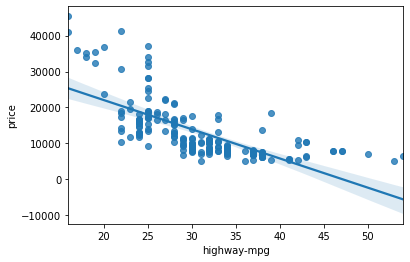

In [29]:
sns.regplot(x="highway-mpg", y="price", data=dataframe)
result = stats.linregress(df["price"], df["highway-mpg"])
result.pvalue

There is strong negative linear(r=-0.7) relationship between price and highway-mpg with a p_value < 0.05, so there is enough evidence to suggest that the two variables are correlated.

+ Price X peak-rpm

0.12243824406274229

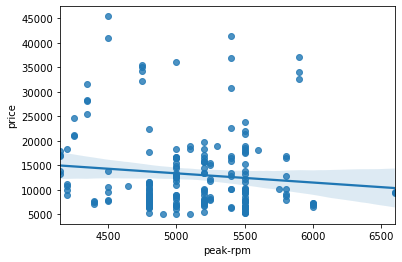

In [30]:
sns.regplot(x="peak-rpm", y="price", data=dataframe)
result = stats.linregress(df["price"], df["peak-rpm"])
result.pvalue

From the graph, no relation seems to exist between price and peak-rpm and p_value < 0.05 which means that there is no enough evidence to suggest that the two variables are correlated, therefore there is no correlation.

+ Price X stroke

0.181795440230865

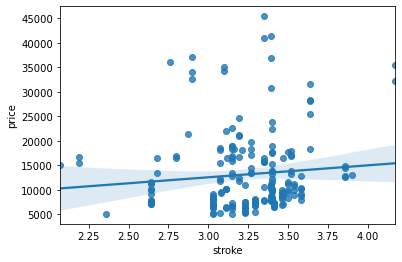

In [31]:
sns.regplot(x="stroke", y="price", data=dataframe)
result = stats.linregress(df["price"], df["stroke"])
result.pvalue

The regression coefficient is 0.095 and p_value > 0.05 so there is no correlation between price and stroke.

+ Price X Length

1.3044828132154154e-29

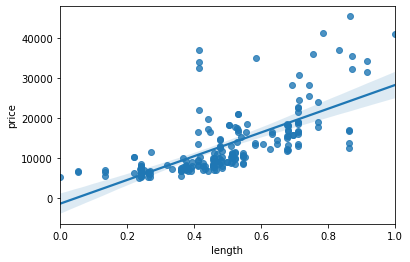

In [32]:
sns.regplot(x="length", y="price", data=dataframe)
result = stats.linregress(df["price"], df["length"])
result.pvalue

There is a positive significant correlation with p_value < 0.05 between price and length of a car.

+ Price X Width

4.912055477984792e-34

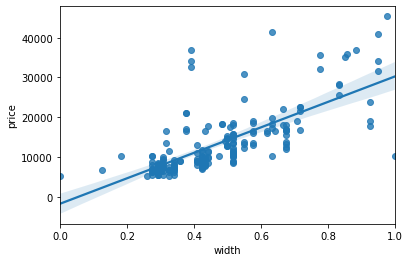

In [33]:
sns.regplot(x="width", y="price", data=dataframe)
result = stats.linregress(df["price"], df["width"])
result.pvalue

There is a positive significant correlation with p_value < 0.05 between price and width of a car.

+ Price X Height

0.04280864599082778

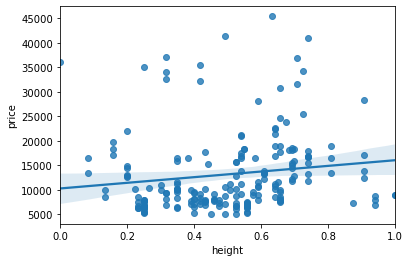

In [34]:
sns.regplot(x="height", y="price", data=dataframe)
result = stats.linregress(df["price"], df["height"])
result.pvalue

There is no correlation between price and height of a car.

According to the previous analysis, `peak-rpm`, `stroke` and `height` of a car can't be good predictors because they are not correlated with price.

If we wanted to remove one of the attributes, highway-mpg should be removed because it is less correlated with price.

So we are left with engine-size as the only good predictor for price.

#### Study the relation between price and the qualitative attributes thorugh box plots.

+ for body-style

<AxesSubplot:xlabel='body-style', ylabel='price'>

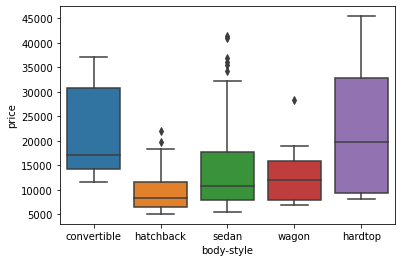

In [35]:
sns.boxplot(x="body-style", y="price", data=df)

The boxplot shows that convertible and hardtop tend to have higher prices than other body-style categories.

+ for engine-location

<AxesSubplot:xlabel='engine-location', ylabel='price'>

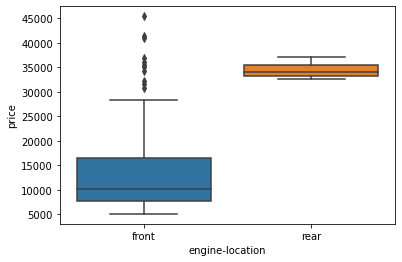

In [36]:
sns.boxplot(x="engine-location", y="price", data=df)

It appears that cars with front engine-location tend to have lower prices than cars with rear engine-location.

+ For drive-wheels

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

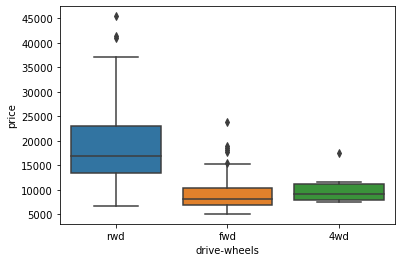

In [37]:
sns.boxplot(x="drive-wheels", y="price", data=df)

                     price
drive-wheels              
fwd            9255.796610
4wd           10241.444444
rwd           19999.805556


Text(0.5, 1.0, 'Average price for each drive-wheel category')

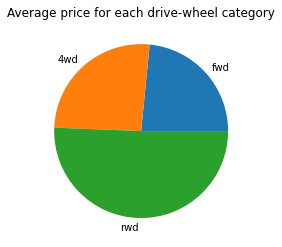

In [38]:
frame1 = df[["price","drive-wheels"]]
price_vs_wheels = frame1.groupby("drive-wheels").mean().sort_values("price")
print(price_vs_wheels)
plt.pie(price_vs_wheels["price"], labels=["fwd","4wd","rwd"])
plt.title("Average price for each drive-wheel category")

Cars with rwd as drive-wheels tend to have higher prices.

#### What combination of drive-wheels and body-style is the most expensive?

In [39]:
frame2 = df[["price","drive-wheels","body-style"]]
price = frame2.groupby(["drive-wheels","body-style"], as_index=False).mean()
price

,drive-wheels,body-style,price
0,4wd,hatchback,8924.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8365.166667
6,fwd,sedan,9827.000000
7,fwd,wagon,10061.181818
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [40]:
price.iloc[np.argmax(price["price"])]

drive-wheels        rwd
body-style      hardtop
price           24202.7
Name: 9, dtype: object

rwd and hardtop is the most expensive combination.